In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
import pandas as pd
from salishsea_tools import viz_tools

In [2]:
vol_mon_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))
vol_mon_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_mon_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_mon_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_mon_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [4]:
def plot_field_12_months_sum(p_var, cmap, ds, tmask, year):
    nrow = 3
    ncol = 4

    fname = '{}_all_domain_subset_daily_sum_y{}'.format(p_var, year)
    cmap.set_bad('gray')

    fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

    for row in np.arange(nrow):
        for col in np.arange(ncol):
            time_idx = row * ncol + col
            salinity = np.ma.masked_array(ds[p_var][time_idx].sum(axis=0), mask=tmask[0])
            colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
            dtime = pd.to_datetime(ds['time'].values[time_idx])
            ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
            viz_tools.set_aspect(ax[row,col]);

    cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, ds[p_var].units))

    # plt.savefig('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/monthly_vis/hindcast_auto/mean/{}.png'.format(fname))

In [5]:
def create_field_12_months_sum(p_var, ds, tmask):

    accum = np.zeros(ds[p_var][:,0,:,:].shape)
    for time_idx in np.arange(len(ds['time'])):
        field = np.ma.masked_array(ds[p_var][time_idx].sum(axis=0), mask=tmask[0])
        accum[time_idx] = field

    return accum


In [19]:
this_p_var = 'fraser_river'

In [20]:
river_mon_2019 = create_field_12_months_sum(this_p_var, vol_mon_2019, tmask)
river_mon_2020 = create_field_12_months_sum(this_p_var, vol_mon_2020, tmask)
river_mon_2021 = create_field_12_months_sum(this_p_var, vol_mon_2021, tmask)
river_mon_2022 = create_field_12_months_sum(this_p_var, vol_mon_2022, tmask)
river_mon_2023 = create_field_12_months_sum(this_p_var, vol_mon_2023, tmask)

In [21]:
river_mon_mean = np.mean([river_mon_2019, river_mon_2020, river_mon_2021, river_mon_2022, river_mon_2023], axis=0)

## Means and Diffs

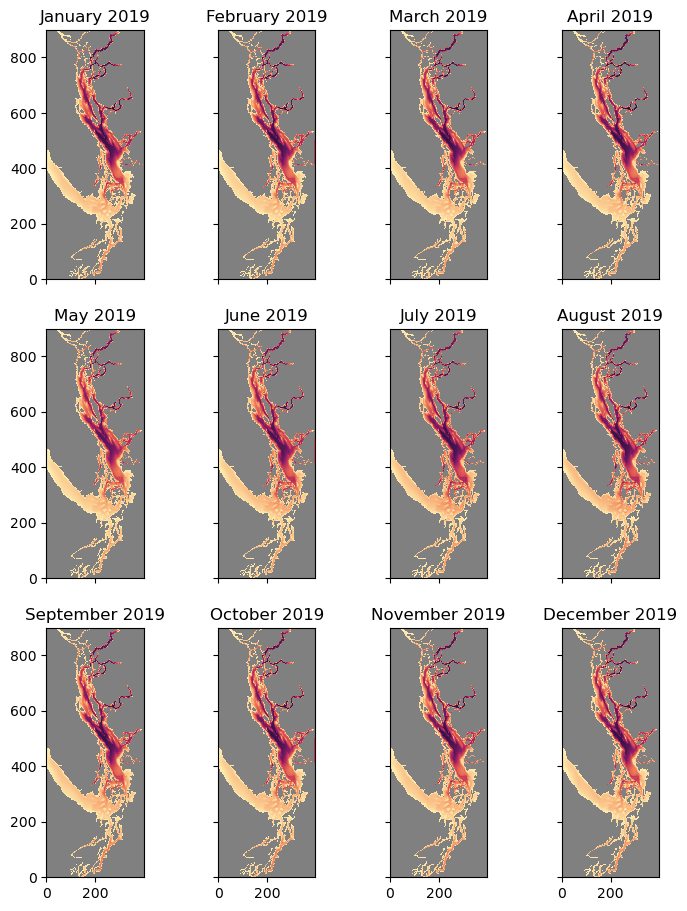

In [25]:
array = river_mon_mean
cmap = cm.matter
nrow = 3
ncol = 4

# fname = '{}_all_domain_subset_daily_sum_y{}'.format(p_var, year)
cmap.set_bad('gray')

fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

for row in np.arange(nrow):
    for col in np.arange(ncol):
        time_idx = row * ncol + col
        salinity = np.ma.masked_array(array[time_idx], mask=tmask[0])
        colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
        dtime = pd.to_datetime(vol_mon_2019['time'].values[time_idx])
        ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
        viz_tools.set_aspect(ax[row,col]);

## Yearly Slice Plots

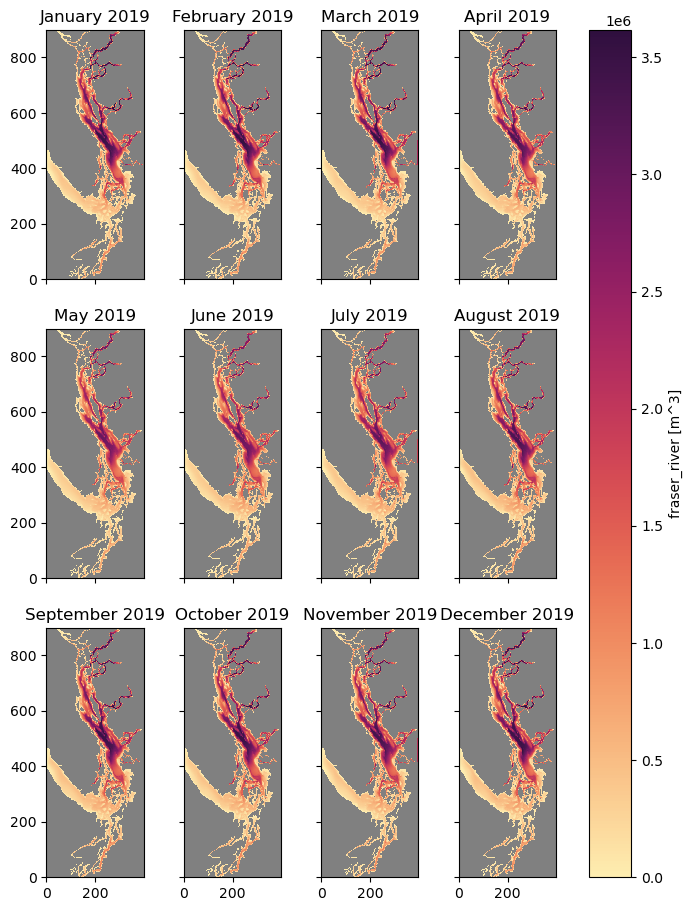

In [11]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2019, tmask, 2019)

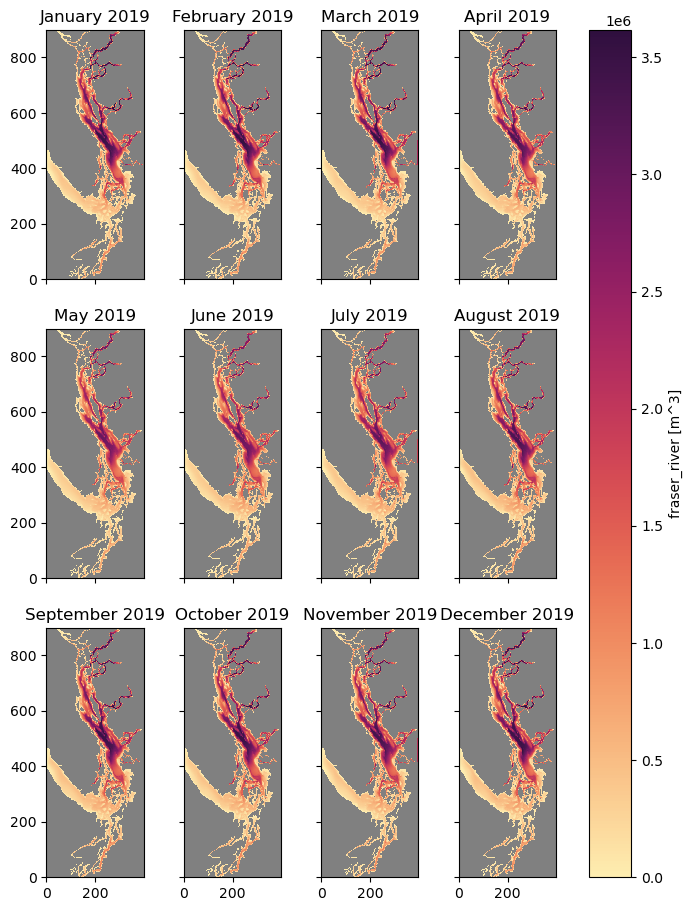

In [12]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2019, tmask, 2019)

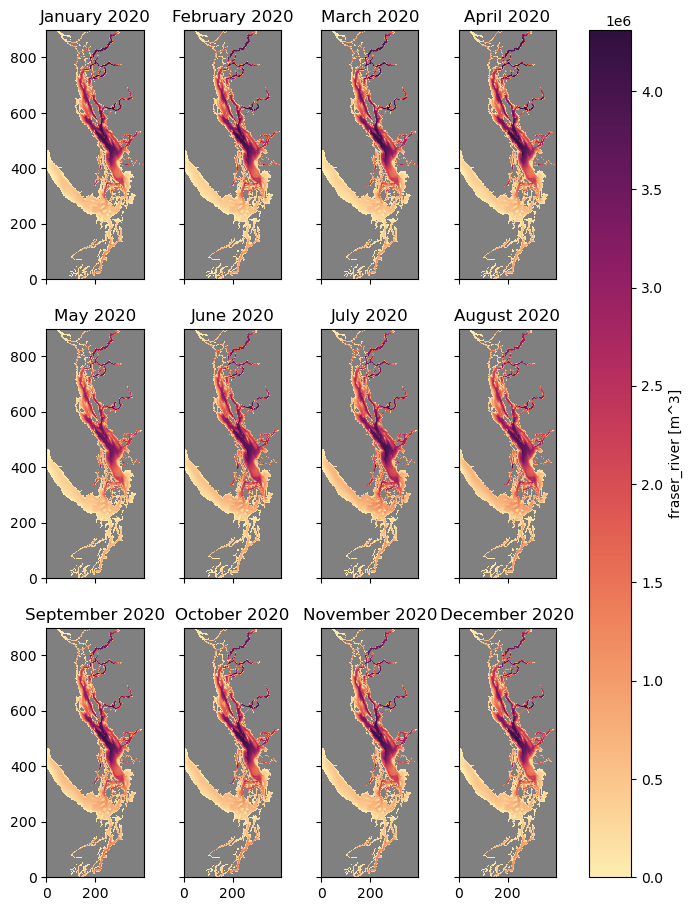

In [13]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2020, tmask, 2020)

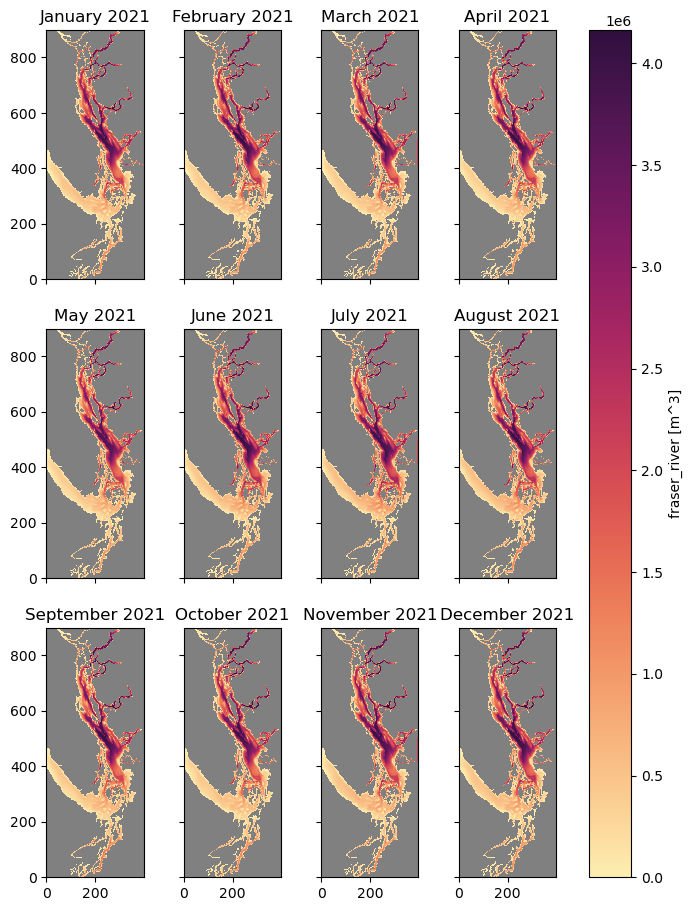

In [14]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2021, tmask, 2021)

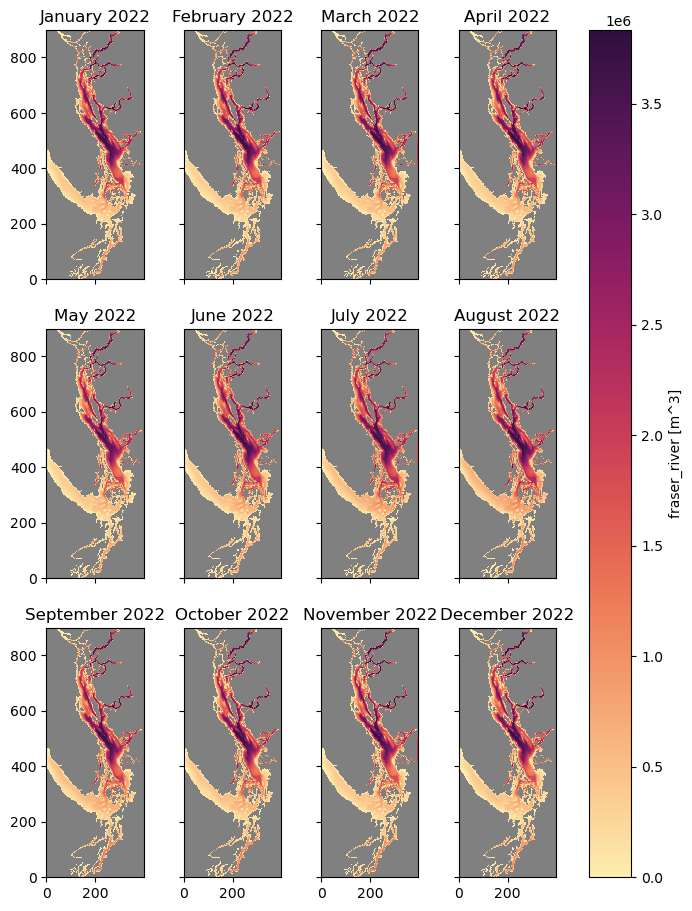

In [15]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2022, tmask, 2022)

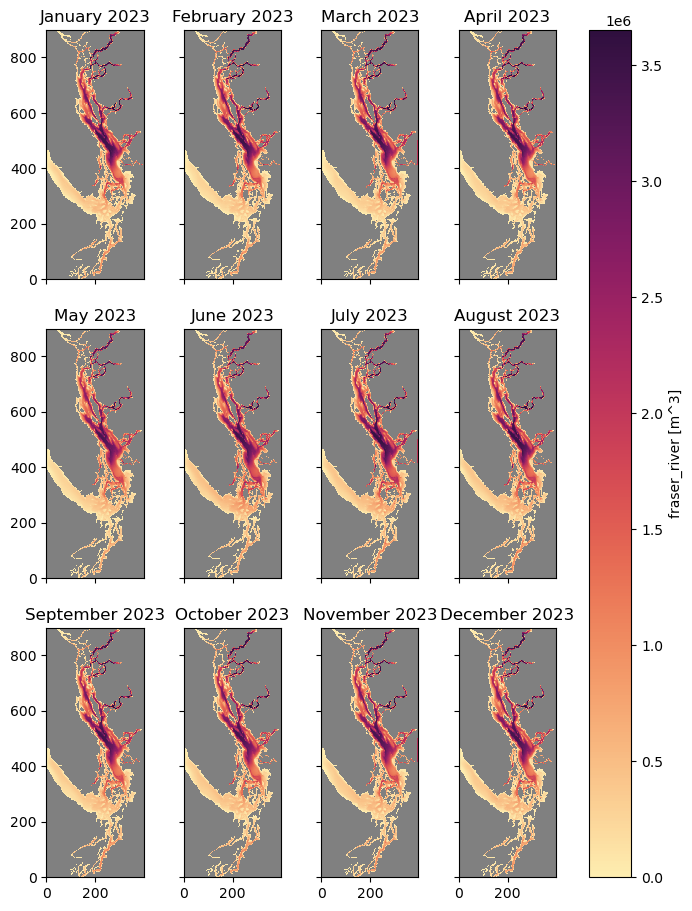

In [16]:
plot_field_12_months_sum('fraser_river', cm.matter, vol_mon_2023, tmask, 2023)